In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

import tensorflow as tf
config = tf.ConfigProto(log_device_placement = True)
config.gpu_options.allow_growth = True
tf.Session(config = config)

from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.models import Model,Sequential
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Embedding, Input, Conv1D, MaxPooling1D, MaxPooling2D, LSTM, Flatten, Dense, Dropout, Reshape, Bidirectional, Conv2D, MaxPool2D, Concatenate, Activation

Using TensorFlow backend.


('X_train.shape:', (60000, 28, 28))
('y_train.shape:', (60000,))
('X_test.shape:', (10000, 28, 28))
('y_test.shape:', (10000,))
('T-shirt/top ', 6000)
('Trouser     ', 6000)
('Pullover    ', 6000)
('Dress       ', 6000)
('Coat        ', 6000)
('Sandal      ', 6000)
('Shirt       ', 6000)
('Sneaker     ', 6000)
('Bag         ', 6000)
('Ankle boot  ', 6000)


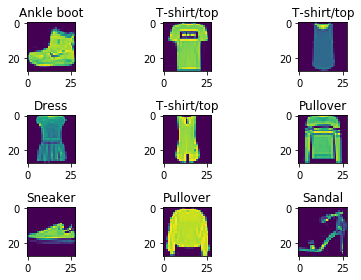

In [2]:
#load_data and show it's look
class_names = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)

counts = np.unique(y_train, return_counts = True)
for x in range(10):
    print ("{0:12}".format(class_names[x]), counts[1][x])

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title('%s'%(class_names[y_train[i]]), fontsize=12)
    plt.imshow(X_train[i])
plt.tight_layout()


In [3]:
# data prepration for multi-classes classification
def get_binary_data(X_train, y_train, X_test, y_test):
    
    # normalization
    X_train = X_train / 255.
    X_test = X_test / 255.
    
    # reshape
    y_train = np.array(y_train, dtype = np.float64)
    y_test = np.array(y_test, dtype = np.float64)
    
    # binarize
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)

    X = np.array(X_train, dtype = np.float64)
    y = np.array(y_train, dtype = np.float64)
    
    # split train and validation
    sss = StratifiedShuffleSplit(n_splits = 10, train_size=0.8, test_size = 0.2, random_state = 0)
    for train_idx, val_idx in sss.split(X_train, y_train):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Invoke the above function to get our data
X_train, y_train, X_val, y_val, X_test, y_test = get_binary_data(X_train, y_train, X_test, y_test)
print('Train data shape: {}'.format(X_train.shape))
print('Train label shape: {}'.format(y_train.shape))
print('Validation data shape: {}'.format(X_val.shape))
print('Validation label shape: {}'.format(y_val.shape))
print('Test data shape: {}'.format(X_test.shape))
print('Test label shape: {}'.format(y_test.shape))

Train data shape: (48000, 28, 28)
Train label shape: (48000, 10)
Validation data shape: (12000, 28, 28)
Validation label shape: (12000, 10)
Test data shape: (10000, 28, 28)
Test label shape: (10000, 10)


learning rate: 5e-2, 1e-2, 5e-3, 1e-3, 1e-4
transfer function: 'relu', 'selu', 'tanh', 'sigmoid', 'linear' 
batch size: 16, 32, 64, 128, 256
epochs 3, 5, 10, 20, 40
optimizer:SGD, RMSprop, Adagrad, Adadelta, Adam
weight initialization:glorot_uniform, uniform, lecun_uniform, he_uniform, lecun normal

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 15s 311us/step - loss: 1.0713 - acc: 0.6411 - val_loss: 0.7409 - val_acc: 0.7381
Epoch 2/10
48000/48000 [==============================] - 14s 296us/step - loss: 0.6636 - acc: 0.7706 - val_loss: 0.5851 - val_acc: 0.7908
Epoch 3/10
48000/48000 [==============================] - 16s 336us/step - loss: 0.5833 - acc: 0.7960 - val_loss: 0.5635 - val_acc: 0.8002
Epoch 4/10
48000/48000 [==============================] - 15s 306us/step - loss: 0.5518 - acc: 0.8069 - val_loss: 0.5267 - val_acc: 0.8127
Epoch 5/10
48000/48000 [==============================] - 14s 295us/step - loss: 0.5299 - acc: 0.8146 - val_loss: 0.6483 - val_acc: 0.7758
Epoch 6/10
48000/48000 [==============================] - 12s 242us/step - loss: 0.5157 - acc: 0.8195 - val_loss: 0.4927 - val_acc: 0.8256
Epoch 7/10
48000/48000 [==============================] - 12s 243us/step - loss: 0.5029 - acc: 0.8239 - val_loss: 0.

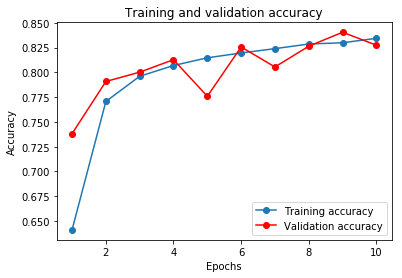

('test_accuracy:', 0.8224)


In [4]:
#model build compile and fit
model1 = Sequential([Conv2D(filters = 3, kernel_size = 4, kernel_initializer='uniform', input_shape = (28,28,1), activation='relu'),
                    #MaxPooling2D((2,2)),
                    Flatten(),
                    Dropout(0.1),
                    Dense(10, kernel_initializer='uniform', activation = 'softmax')])

optimizer = SGD(lr=0.05, decay=1e-6)#, momentum=0.95, nesterov=True)
model1.compile(optimizer = optimizer, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

#model1.summary()
history = model1.fit(X_train[:,:,:, np.newaxis],
                    y_train, 
                    epochs = 10, 
                    batch_size = 256, 
                    validation_data = (X_val[:,:,:, np.newaxis], y_val),
                    verbose=1)

test_acc = model1.evaluate(X_test[:,:,:,np.newaxis], y_test, verbose=0)[1]
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-o', label = 'Training accuracy')
plt.plot(epochs, val_acc, '-ro', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('test_accuracy:', test_acc)

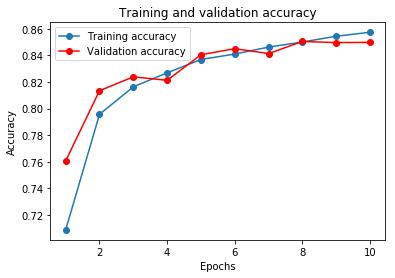

test_accuracy: 0.8404


In [83]:
#model build compile and fit
model2 = Sequential([Conv2D(filters = 3, kernel_size = 4, kernel_initializer='lecun_uniform', input_shape = (28,28,1), activation='relu'),
                    #MaxPooling2D((2,2)),
                    Flatten(),
                    Dropout(0.1),
                    Dense(10, kernel_initializer='lecun_uniform', activation = 'softmax')])

optimizer = SGD(lr=0.05, decay=1e-6)#, momentum=0.95, nesterov=True)
model2.compile(optimizer = optimizer, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

#model2.summary()
history = model2.fit(X_train[:,:,:, np.newaxis],
                    y_train, 
                    epochs = 10, 
                    batch_size = 256, 
                    validation_data = (X_val[:,:,:, np.newaxis], y_val),
                    verbose=0)

test_acc = model2.evaluate(X_test[:,:,:,np.newaxis], y_test, verbose=0)[1]
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-o', label = 'Training accuracy')
plt.plot(epochs, val_acc, '-ro', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('test_accuracy:', test_acc)

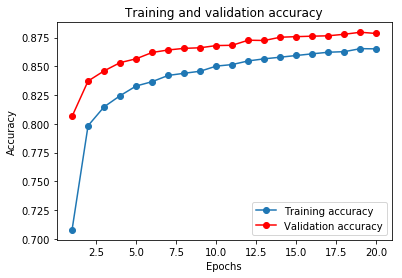

test_accuracy: 0.8759


In [91]:
#model build compile and fit
model3 = Sequential([Conv2D(filters = 6, kernel_size = 8, input_shape = (28,28,1), activation='relu'),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dropout(0.1),
                    Dense(128, activation = 'relu'),
                    Dropout(0.1),
                    Dense(16, activation = 'relu'),
                    Dropout(0.1),
                    Dense(10, activation = 'softmax')])

optimizer = Adagrad(lr=0.01, decay=1e-6)#, momentum=0.95, nesterov=True)
model3.compile(optimizer = optimizer, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

#model3.summary()
history = model3.fit(X_train[:,:,:, np.newaxis],
                    y_train, 
                    epochs = 20, 
                    batch_size = 256, 
                    validation_data = (X_val[:,:,:, np.newaxis], y_val),
                    verbose=0)

test_acc = model3.evaluate(X_test[:,:,:,np.newaxis], y_test, verbose=0)[1]
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-o', label = 'Training accuracy')
plt.plot(epochs, val_acc, '-ro', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('test_accuracy:', test_acc)

In [ ]:
#model build compile and fit
model4 = Sequential([Conv2D(filters = 6, kernel_size = 8, input_shape = (28,28,1), activation='selu'),
                    #MaxPooling2D((2,2)),
                    Flatten(),
                    Dropout(0.1),
                    Dense(32, activation = 'relu'),
                    Dropout(0.1),
                    Dense(16, activation = 'relu'),
                    Dropout(0.1),
                    Dense(10, activation = 'softmax')])

optimizer = Adagrad(lr=0.02, decay=1e-6)#, momentum=0.95, nesterov=True)
model4.compile(optimizer = optimizer, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

#model4.summary()
history = model4.fit(X_train[:,:,:, np.newaxis],
                    y_train, 
                    epochs = 5, 
                    batch_size = 64, 
                    validation_data = (X_val[:,:,:, np.newaxis], y_val),
                    verbose=1)

test_acc = model4.evaluate(X_test[:,:,:,np.newaxis], y_test, verbose=0)[1]
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-o', label = 'Training accuracy')
plt.plot(epochs, val_acc, '-ro', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('test_accuracy:', test_acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 31s 653us/step - loss: 0.8290 - acc: 0.7099 - val_loss: 0.5313 - val_acc: 0.8131
Epoch 2/50
48000/48000 [==============================] - 27s 570us/step - loss: 0.6023 - acc: 0.7889 - val_loss: 0.4744 - val_acc: 0.8329
Epoch 3/50
48000/48000 [==============================] - 26s 545us/step - loss: 0.5580 - acc: 0.8031 - val_loss: 0.4548 - val_acc: 0.8403
Epoch 4/50
48000/48000 [==============================] - 25s 528us/step - loss: 0.5343 - acc: 0.8120 - val_loss: 0.4447 - val_acc: 0.8437
Epoch 5/50
48000/48000 [==============================] - 24s 510us/step - loss: 0.5185 - acc: 0.8168 - val_loss: 0.4315 - val_acc: 0.8479
Epoch 6/50
48000/48000 [==============================] - 26s 542us/step - loss: 0.5058 - acc: 0.8195 - val_loss: 0.4257 - val_acc: 0.8499
Epoch 7/50
48000/48000 [==============================] - 26s 544us/step - loss: 0.4939 - acc: 0.8251 - val_loss: 0.

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 14s 285us/step - loss: 0.8097 - acc: 0.7064 - val_loss: 0.5071 - val_acc: 0.8128
Epoch 2/20
48000/48000 [==============================] - 11s 238us/step - loss: 0.5015 - acc: 0.8180 - val_loss: 0.4326 - val_acc: 0.8440
Epoch 3/20
48000/48000 [==============================] - 11s 232us/step - loss: 0.4536 - acc: 0.8342 - val_loss: 0.4047 - val_acc: 0.8518
Epoch 4/20
48000/48000 [==============================] - 12s 245us/step - loss: 0.4248 - acc: 0.8421 - val_loss: 0.3910 - val_acc: 0.8559
Epoch 5/20
48000/48000 [==============================] - 12s 240us/step - loss: 0.4077 - acc: 0.8507 - val_loss: 0.3848 - val_acc: 0.8563
Epoch 6/20
48000/48000 [==============================] - 11s 238us/step - loss: 0.3930 - acc: 0.8561 - val_loss: 0.3641 - val_acc: 0.8663
Epoch 7/20
48000/48000 [==============================] - 11s 236us/step - loss: 0.3859 - acc: 0.8585 - val_loss: 0.

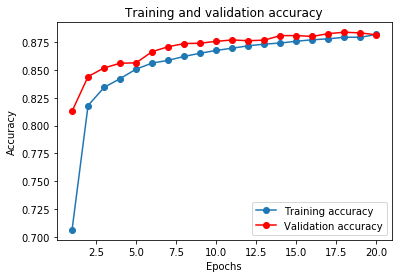

test_accuracy: 0.8798


In [88]:
#model build compile and fit @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
model5 = Sequential([Conv2D(filters = 6, kernel_size = 8, input_shape = (28,28,1), activation='relu'),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dropout(0.1),
                    Dense(64, activation = 'relu'),
                    Dropout(0.1),
                    Dense(16, activation = 'relu'),
                    Dropout(0.1),
                    Dense(10, activation = 'softmax')])

optimizer = Adagrad(lr=0.01, decay=1e-6)#, momentum=0.95, nesterov=True)
model5.compile(optimizer = optimizer, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

#model5.summary()
history = model5.fit(X_train[:,:,:, np.newaxis],
                    y_train, 
                    epochs = 20, 
                    batch_size = 256, 
                    validation_data = (X_val[:,:,:, np.newaxis], y_val),
                    verbose=1)

test_acc = model5.evaluate(X_test[:,:,:,np.newaxis], y_test, verbose=0)[1]
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-o', label = 'Training accuracy')
plt.plot(epochs, val_acc, '-ro', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('test_accuracy:', test_acc)

In [89]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 21, 21, 6)         390       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 6)         0         
_________________________________________________________________
flatten_53 (Flatten)         (None, 600)               0         
_________________________________________________________________
dropout_97 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 64)                38464     
_________________________________________________________________
dropout_98 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 16)                1040      
__________

In [5]:
test = X_test[0:9]
i=0
for t in test:
    i+=1
    name = class_names[np.argmax(model.predict(t[np.newaxis,:,:,np.newaxis]))]
    print("Answer:", name)
    plt.subplot(3,3,i)
    plt.title('%s'%, fontsize=12)
    plt.imshow(t)
    
plt.tight_layout()


SyntaxError: invalid syntax (<ipython-input-5-aca203bc1280>, line 8)